<h2> Multi-class Classification </h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,r2_score

In [21]:
X,y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train[:5], y_train[:5]

(array([[4.9, 2.5],
        [6.9, 3.1],
        [5.1, 3.5],
        [5.5, 2.3],
        [5.1, 3.8]]),
 array([2, 1, 0, 1, 0]))

In [37]:
"""
The one-vs-rest strategy, also known as one-vs-all, is implemented in OneVsRestClassifier. 
The strategy consists in fitting one classifier per class. 
For each classifier, the class is fitted against all the other classes. 
In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability.
 Since each class is represented by one and only one classifier, it is possible to gain knowledge about the class by inspecting its corresponding classifier. 
 This is the most commonly used strategy and is a fair default choice.
"""

'\nThe one-vs-rest strategy, also known as one-vs-all, is implemented in OneVsRestClassifier. \nThe strategy consists in fitting one classifier per class. \nFor each classifier, the class is fitted against all the other classes. \nIn addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability.\n Since each class is represented by one and only one classifier, it is possible to gain knowledge about the class by inspecting its corresponding classifier. \n This is the most commonly used strategy and is a fair default choice.\n'

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf = SVC(kernel="rbf", gamma=0.7, C=1.0)
clf = OneVsRestClassifier(clf)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("score", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=list(map(str,clf.classes_) )))

score 0.7333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.46      0.60        13
           2       0.46      0.86      0.60         7

    accuracy                           0.73        30
   macro avg       0.77      0.77      0.73        30
weighted avg       0.81      0.73      0.73        30



/var/folders/_2/y461zwnj1zvg7rpcqwc9zm640000gn/T/ipykernel_55586/4129130972.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap=plt.cm.coolwarm, s=20, edgecolors='black', label="Predict", marker="x")


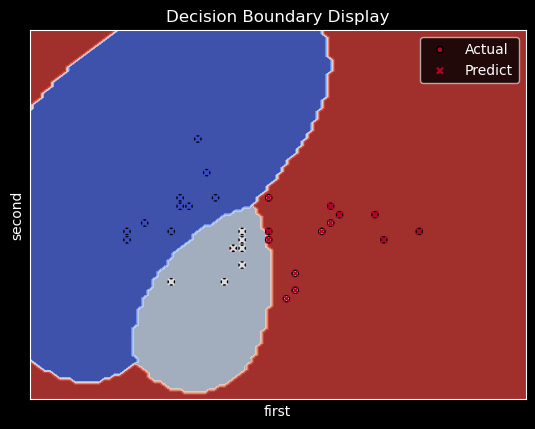

In [35]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel="first",
    ylabel="second",
)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='black', label="Actual", marker="o")
ax.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap=plt.cm.coolwarm, s=20, edgecolors='black', label="Predict", marker="x")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Decision Boundary Display")
ax.legend()

In [39]:
"""
Not used much and not default...

OneVsOneClassifier constructs one classifier per pair of classes. At prediction time, the class which received the most votes is selected. In the event of a tie (among two classes with an equal number of votes), it selects the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers.
"""

'\nNot used much and not default...\n\nOneVsOneClassifier constructs one classifier per pair of classes. At prediction time, the class which received the most votes is selected. In the event of a tie (among two classes with an equal number of votes), it selects the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers.\n'

<h2> Output Code Clasifier </h2>

In [40]:
"""
Error-Correcting Output Code-based strategies are fairly different from one-vs-the-rest and one-vs-one. With these strategies, each class is represented in a Euclidean space, where each dimension can only be 0 or 1. Another way to put it is that each class is represented by a binary code (an array of 0 and 1). The matrix which keeps track of the location/code of each class is called the code book. The code size is the dimensionality of the aforementioned space. Intuitively, each class should be represented by a code as unique as possible and a good code book should be designed to optimize classification accuracy. In this implementation, we simply use a randomly-generated code book as advocated in [3] although more elaborate methods may be added in the future.

At fitting time, one binary classifier per bit in the code book is fitted. At prediction time, the classifiers are used to project new points in the class space and the class closest to the points is chosen.
"""

'\nError-Correcting Output Code-based strategies are fairly different from one-vs-the-rest and one-vs-one. With these strategies, each class is represented in a Euclidean space, where each dimension can only be 0 or 1. Another way to put it is that each class is represented by a binary code (an array of 0 and 1). The matrix which keeps track of the location/code of each class is called the code book. The code size is the dimensionality of the aforementioned space. Intuitively, each class should be represented by a code as unique as possible and a good code book should be designed to optimize classification accuracy. In this implementation, we simply use a randomly-generated code book as advocated in [3] although more elaborate methods may be added in the future.\n\nAt fitting time, one binary classifier per bit in the code book is fitted. At prediction time, the classifiers are used to project new points in the class space and the class closest to the points is chosen.\n'

In [43]:
from sklearn.multiclass import OutputCodeClassifier
clf = SVC(kernel="rbf", gamma=0.7, C=1.0)
clf = OutputCodeClassifier(clf, code_size=2, random_state=0)
clf.fit(X_train, y_train)
clf.code_book_, clf.estimators_

(array([[ 1.,  1.,  1.,  1., -1.,  1.],
        [-1.,  1.,  1., -1.,  1.,  1.],
        [ 1.,  1., -1., -1., -1.,  1.]]),
 [SVC(gamma=0.7),
  _ConstantPredictor(),
  SVC(gamma=0.7),
  SVC(gamma=0.7),
  SVC(gamma=0.7),
  _ConstantPredictor()])